# Clustering - Split Dataset by sentence length
**Task**: Take a clustering dataset, split it into multiple datasets based on the length of the sentences and benchmark the performance of a clustering algorithm on each of the datasets.

In [ ]:
%pip install python-dotenv datasets transformers

In [2]:
# Helper Functions

from dotenv import load_dotenv
if(load_dotenv(".env") == False):
    print("No .env file found")
from datasets import load_dataset
from transformers import AutoModel
import matplotlib.pyplot as plt
import numpy as np

def split_dataset_by_word_count(
    dataset, split="test", splits=[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
):
    # split dataset into bins of words of max length:
    binned_clusters = {split: {"sentences": [], "labels": []} for split in splits}

    for cluster_set in dataset[split]:
        for i in range(len(cluster_set["sentences"])):
            sentence = cluster_set["sentences"][i]
            label = cluster_set["labels"][i]
            words = len(sentence.split())
            for split in splits:
                if words <= split:
                    binned_clusters[split]["sentences"].append(sentence)
                    binned_clusters[split]["labels"].append(label)
                    break

    return binned_clusters


def dataset_distribution_plot(dataset, name, id, bins, range):
    """
    plot the distribution of word amount per sentence
    dataset: the dataset to plot
    name: the name of the dataset BigCities
    id: the id of the dataset, eg. big_cities
    """

    word_amounts = []
    for i in range(len(dataset["test"]["sentences"])):
        word_amounts += [
            len(sentence.split()) for sentence in dataset["test"]["sentences"][i]
        ]

    plt.rcParams["font.family"] = "Inter"
    plt.rcParams["axes.prop_cycle"] = plt.cycler(
        "color", ["#4269D0", "#3BA951", "#EFB117", "#FF725C"]
    )

    # create a histogram, limit x axis to 20000 and use 16 bins
    plt.hist(word_amounts, bins=bins, range=range)
    # label the axes
    plt.xlabel("Words per document")
    plt.ylabel("Document count")

    plt.title("Distribution of words per document in the " + name + " dataset")

    plt.savefig("results/clustering/" + id + "_distribution.png", dpi=300)

    plt.show()

In [9]:
dataset = load_dataset("jinaai/cities_wiki_clustering")

In [15]:
for split in binned_clusters:
  print(f"Split: {split}")
  result = evaluate(model, binned_clusters[split]["sentences"], binned_clusters[split]["labels"])
  print(result)
  # save to file
  with open(f"results_{split}.txt", "w") as file:
    file.write(str(result))

Split: 20
1707131459.600395
1707131464.816326
1707131464.8168871


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


1707131465.161779
1707131465.178912
{'v_measure': 0.6222482540986762, 'v_measure_std': 0.0}
Split: 50
1707131465.180583
1707131476.114367
1707131476.115038
1707131476.293516
1707131476.2967901
{'v_measure': 0.7798702107092992, 'v_measure_std': 0.0}
Split: 100
1707131476.299695
1707131495.097559
1707131495.0980449
1707131495.45261
1707131495.454756
{'v_measure': 0.771650300505658, 'v_measure_std': 0.0}
Split: 200
1707131495.459198
1707131549.838075
1707131549.838689
1707131550.3541949
1707131550.357494
{'v_measure': 0.7763865416452733, 'v_measure_std': 0.0}
Split: 500
1707131550.362349
1707131798.810389
1707131798.813652
1707131799.314086
1707131799.3171468
{'v_measure': 0.788526394438132, 'v_measure_std': 0.0}
Split: 1000
1707131799.321886
1707132328.902959
1707132328.910593
1707132329.421462
1707132329.446464
{'v_measure': 0.8040935772980364, 'v_measure_std': 0.0}
Split: 2000
1707132329.472538


KeyboardInterrupt: 

In [4]:
jina_results = {
    "20": {"v_measure": 0.6435854175764263, "v_measure_std": 0.0},
    "50": {"v_measure": 0.7937161261612886, "v_measure_std": 0.0},
    "100": {"v_measure": 0.7569292087078852, "v_measure_std": 0.0},
    "200": {"v_measure": 0.7837115279149208, "v_measure_std": 0.0},
    "500": {"v_measure": 0.783320396864822, "v_measure_std": 0.0},
    "1000": {"v_measure": 0.7853601696893313, "v_measure_std": 0.0},
    "2000": {"v_measure": 0.8286202156764235, "v_measure_std": 0.0},
    "5000": {"v_measure": 0.8186308775146232, "v_measure_std": 0.0},
    "10000": {"v_measure": 0.8395288562539386, "v_measure_std": 0.0},
    "20000": {"v_measure": 0.801056300581111, "v_measure_std": 0.0},
}

gte_results = {
    "20": {"v_measure": 0.6222482540986762, "v_measure_std": 0.0},
    "50": {"v_measure": 0.7798702107092992, "v_measure_std": 0.0},
    "100": {"v_measure": 0.771650300505658, "v_measure_std": 0.0},
    "200": {"v_measure": 0.7763865416452733, "v_measure_std": 0.0},
    "500": {"v_measure": 0.788526394438132, "v_measure_std": 0.0},
    "1000": {"v_measure": 0.8040935772980364, "v_measure_std": 0.0},
    "2000": {"v_measure": 0.8144683159455076, "v_measure_std": 0.0},
    "5000": {"v_measure": 0.8143484186457459, "v_measure_std": 0.0},
    "10000": {"v_measure": 0.8205899050814626, "v_measure_std": 0.0},
    "20000": {"v_measure": 0.7590519167416516, "v_measure_std": 0.0},
}

Split: 2000
2000 :  {'v_measure': 0.8144683159455076, 'v_measure_std': 0.0}
Split: 5000
5000 :  {'v_measure': 0.8143484186457459, 'v_measure_std': 0.0}
Split: 10000
10000 :  {'v_measure': 0.8205899050814626, 'v_measure_std': 0.0}
Split: 20000
20000 :  {'v_measure': 0.7590519167416516, 'v_measure_std': 0.0}


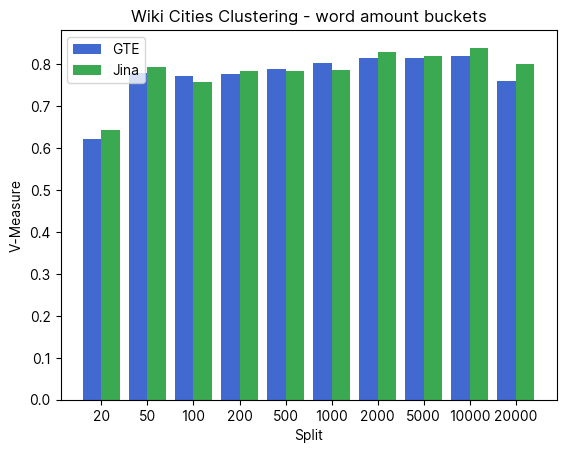

In [7]:
# plot results
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Inter"
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", [ "#4269D0","#3BA951", "#EFB117", "#FF725C"])


# plot gte and jina results in one plot
fig, ax = plt.subplots()

x = np.arange(len(jina_results))

rects1 = ax.bar(x - 0.2, [gte_results[str(split)]["v_measure"] for split in gte_results], 0.4, label='GTE')
rects2 = ax.bar(x + 0.2, [jina_results[str(split)]["v_measure"] for split in jina_results], 0.4, label='Jina')

ax.set_ylabel('V-Measure')
ax.set_xlabel('Split')

ax.set_xticks(x)
ax.set_xticklabels(jina_results.keys())

# add title
ax.set_title('Wiki Cities Clustering - word amount buckets')

ax.legend()
plt.savefig('./results/clustering/wiki_cities_buckets.png', dpi=300)
plt.show()